In [1]:
import cv2
from matplotlib import pyplot as plt
import ov_coefs
from typing import Tuple
import numpy

# Input Data

In [5]:
input_img = cv2.imread("../assets/Van_Gogh_256x256.png", cv2.IMREAD_COLOR)
input_img = cv2.cvtColor(input_img,cv2.COLOR_BGR2RGB)
# input_img = cv2.resize(input_img, (256, 311))

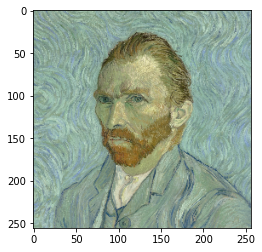

(256, 256, 3)


In [8]:
plt.imshow(input_img)
plt.show()
plt.imsave("input.png", input_img)
print(input_img.shape)

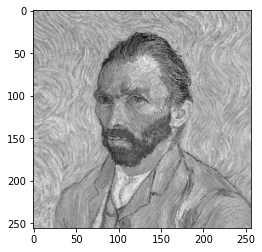

(256, 256)


In [12]:
gray_input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_input_img, "gray")
plt.show()
cv2.imwrite("output_gray.png", gray_input_img)
print(gray_input_img.shape)

In [21]:
def center_crop(img: numpy.ndarray, dim: Tuple[int, int]):
  """Returns center cropped image
  Args:
  img: image to be center cropped
  dim: dimensions (width, height) to be cropped
  """

  width, height = img.shape[1], img.shape[0]

  # process crop width and height for max available dimension
  crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1]
  crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0] 
  mid_x, mid_y = int(width/2), int(height/2)
  cw2, ch2 = int(crop_width/2), int(crop_height/2) 
  crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
  return crop_img

In [22]:
crop_img = center_crop(gray_input_img, (256, 256))

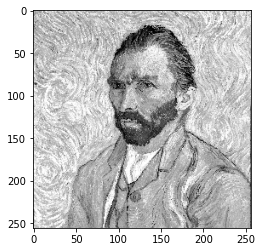

In [23]:
plt.imshow(crop_img, 'gray')
plt.show()

# Floyd-steinburg Algorithm

In [13]:
def fs_halftone(gray_scale_img: numpy.ndarray):
  """ Floyd-Steinberg Dithering Algorithm """

  height, width = gray_scale_img.shape[0], gray_scale_img.shape[1]
  output_image = gray_scale_img.copy()
  bounded = lambda i: 255 if i > 255 else ( 0 if i < 0 else i )

  for y in range(0, height):
    for x in range(0, width):
      old_intensity = output_image[y, x]
      new_intensity = 255 if old_intensity > 128 else 0

      output_image[y,x] = new_intensity
      error = old_intensity - new_intensity

      if (x < width - 1):
        adjusted = output_image[y, x + 1] + error * 7 / 16
        output_image[y, x + 1] = bounded(adjusted)

      if (y < height - 1):
        if (x > 0):
          adjusted = output_image[y + 1, x - 1] + error * 3 / 16
          output_image[y + 1, x - 1] = bounded(adjusted)
        
        adjusted = output_image[y + 1, x] + error * 5 / 16
        output_image[y + 1, x] = bounded(adjusted)

        if (x < width - 1):
          adjusted = output_image[y + 1, x + 1] + error * 1 / 16
          output_image[y + 1, x + 1] = bounded(adjusted)
  return output_image


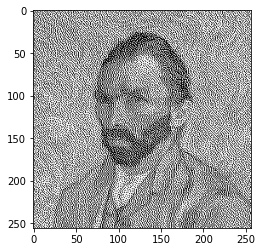

In [14]:
fs_halftone_img = fs_halftone(gray_input_img)
plt.imshow(fs_halftone_img, 'gray')
plt.show()

# Ostromoukhov Algorithm

In [15]:
def ov_halftone(gray_scale_img: numpy.ndarray):
  """ Floyd-Steinberg Dithering Algorithm """

  height, width = gray_scale_img.shape[0], gray_scale_img.shape[1]
  output_image = gray_scale_img.copy()
  bounded = lambda i: 255 if i > 255 else ( 0 if i < 0 else i )
  coefs = lambda intensity: ov_coefs.coefs_256[intensity]
  
  for y in range(0, height):
    for x in range(0, width):
      old_intensity = output_image[y, x]
      new_intensity = 255 if old_intensity > 128 else 0
      output_image[y,x] = new_intensity
      error = old_intensity - new_intensity

      if (x < width - 1):
        adjusted = output_image[y, x + 1] + error * coefs(error)[0] / coefs(error)[3]
        output_image[y, x + 1] = bounded(adjusted)

      if (y < height - 1):
        if (x > 0):
          adjusted = output_image[y + 1, x - 1] + error * coefs(error)[1] / coefs(error)[3]
          output_image[y + 1, x - 1] = bounded(adjusted)
        
        adjusted = output_image[y + 1, x] + error * coefs(error)[2] / coefs(error)[3]
        output_image[y + 1, x] = bounded(adjusted)
  return output_image

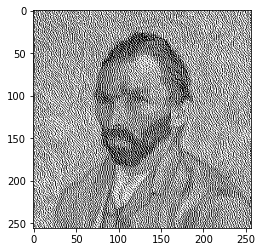

In [16]:
ov_halftone_img = ov_halftone(gray_input_img)
plt.imshow(ov_halftone_img, 'gray')
plt.show()

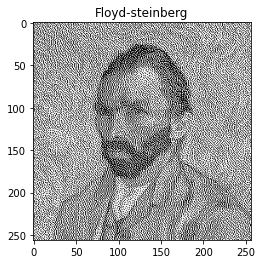

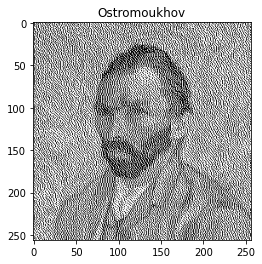

True

In [17]:
plt.imshow(fs_halftone_img, 'gray')
plt.title('Floyd-steinberg')
plt.show()
plt.imshow(ov_halftone_img, 'gray')
plt.title('Ostromoukhov')
plt.show()

cv2.imwrite("output_fs.png", ov_halftone_img)
cv2.imwrite("output_ov.png", fs_halftone_img)